In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False, hline=True):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')
    
    # Plot a horizontal line at y=0
    if hline:
        plt.axhline(0, color='black', lw=0.5)

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'logs/log.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,D/loss_real,D/loss_fake,D/loss_gp,D/loss_cls,D/loss_dom,G/loss_fake,G/loss_rec,G/loss_cls,G/loss_dom,G/loss_rot
0,0:00:12,100,-9.1198,2.0452,1.3813,0.1418,2.7005,-1.9846,0.3312,1.3501,2.6978,0.2508
1,0:00:23,200,-6.4938,-1.2576,1.3729,0.0747,2.7783,1.6711,0.1622,1.3748,2.7628,0.1730
2,0:00:33,300,-7.1783,-1.0073,1.4163,0.1396,2.7251,0.1452,0.1358,1.3953,2.7259,0.1533
3,0:00:43,400,-1.7242,-4.0127,1.4442,0.0460,2.7054,4.1528,0.1417,1.4257,2.7033,0.1650
4,0:00:54,500,-3.2669,-1.1700,1.3171,0.0238,2.6922,1.0436,0.1056,1.3102,2.6823,0.1233


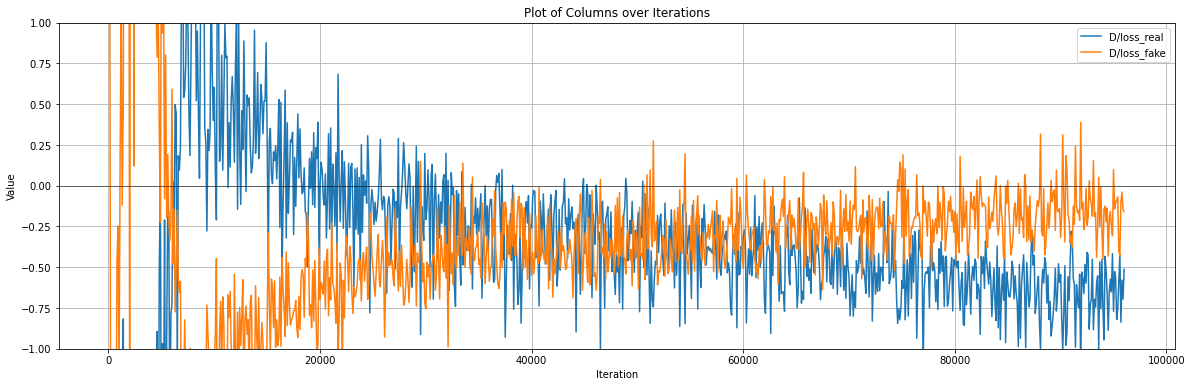

In [4]:
plot_columns(history, ['D/loss_real', 'D/loss_fake'], logaxis=False, ylim=(-1, 1))

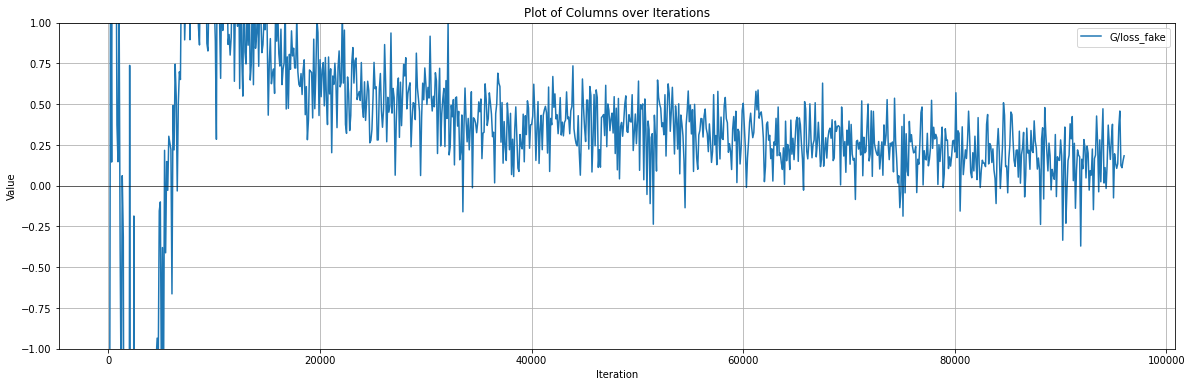

In [5]:
plot_columns(history, ['G/loss_fake'], logaxis=False, ylim=(-1, 1))

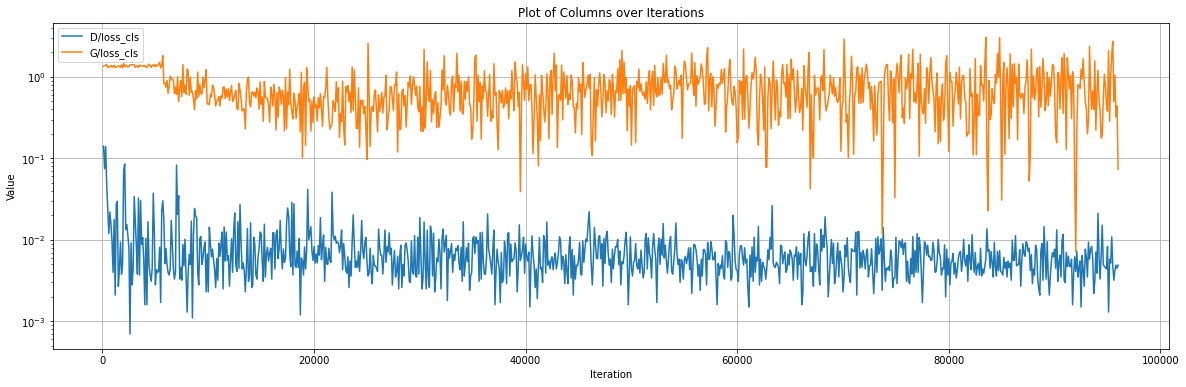

In [17]:
plot_columns(history, ['D/loss_cls', 'G/loss_cls'], logaxis=True)

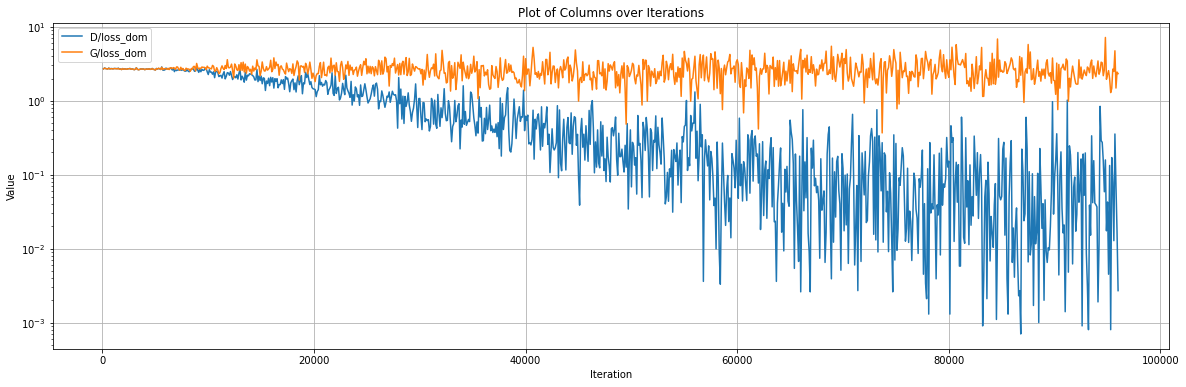

In [7]:
plot_columns(history, ['D/loss_dom', 'G/loss_dom'], logaxis=True, hline=False)

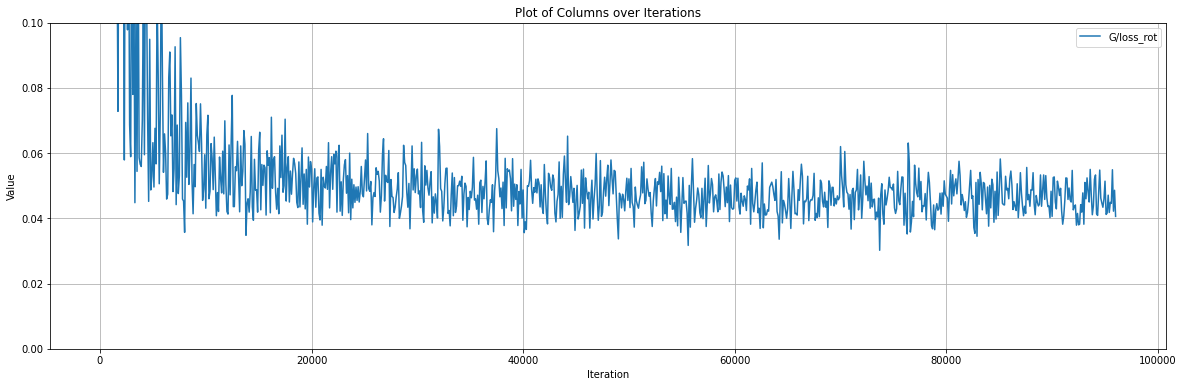

In [8]:
plot_columns(history, ['G/loss_rot'], logaxis=False, hline=False, ylim=(0, 0.1))

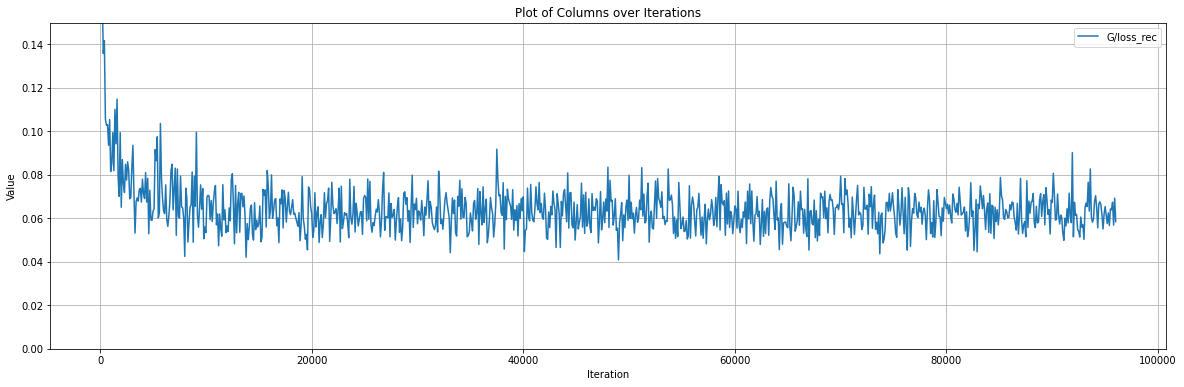

In [9]:
plot_columns(history, ['G/loss_rec'], logaxis=False, ylim=(0, 0.15))

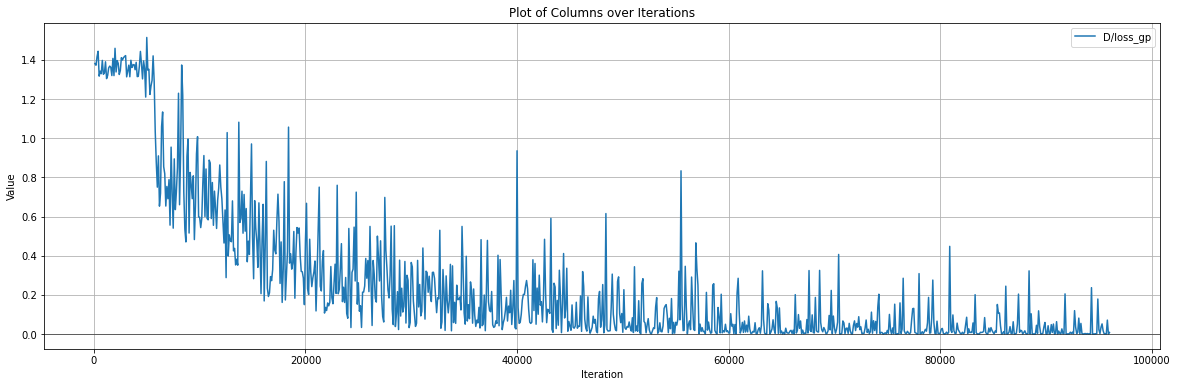

In [10]:
plot_columns(history, ['D/loss_gp'], logaxis=False)

# Metrics

## TSTR Score

In [11]:
file_path = 'results/TSTR_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,source,domain,accuracy,loss,f1
0,10000,WAL,15,0.780000,1.855278,0.704717
1,10000,WAL,16,0.277778,2.275946,0.218648
2,10000,WAL,17,0.283019,2.585810,0.238265
3,10000,WAL,18,0.685185,0.900339,0.694153
4,10000,WAL,19,0.277778,2.301431,0.225617


Maximum average accuracy: 0.7526 at step 80000


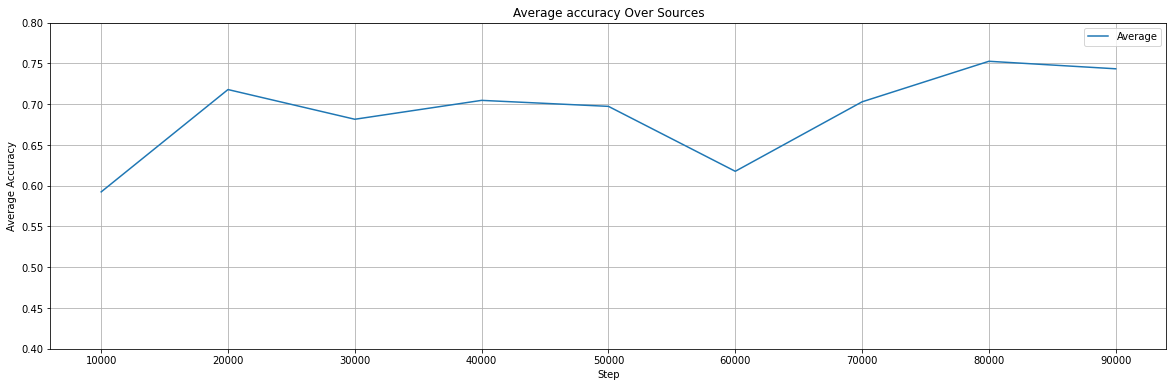

Maximum average f1: 0.6997 at step 80000


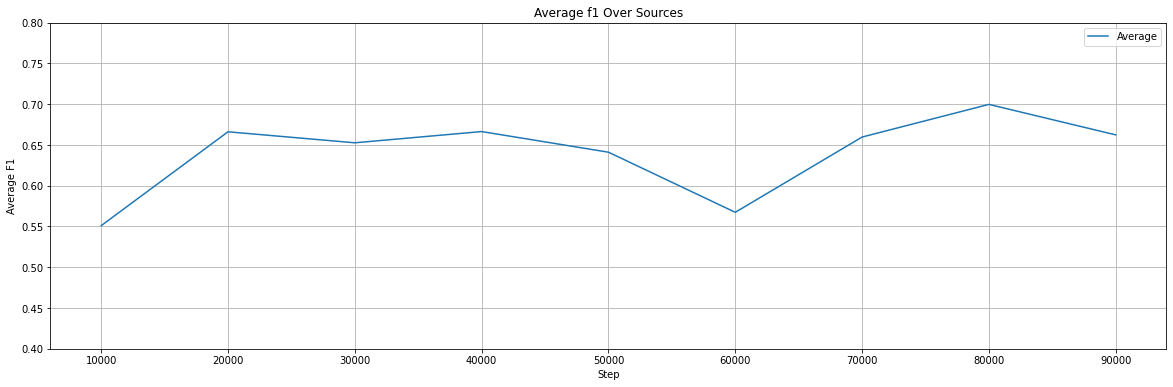

Minimum average loss: 1.2532 at step 80000


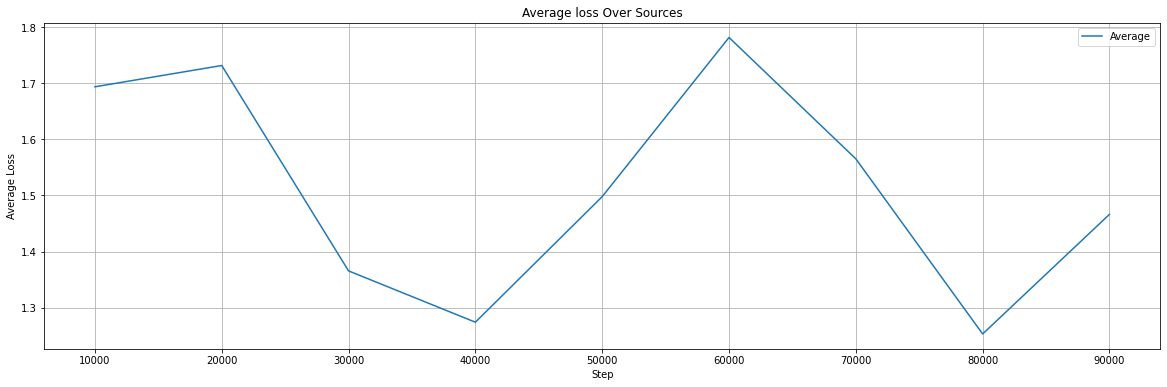

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_sources(metrics, metric, ylim=None):
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step' and then calculate the mean across 'source' and 'domain'
    mean_data = filtered_data.groupby(['step']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data[metric], label='Average')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    if metric == 'accuracy' or metric == 'f1':
        # Find the maximum value of the metric and its corresponding step
        max_value = mean_data[metric].max()
        max_step = mean_data[mean_data[metric] == max_value]['step'].values[0]
        print(f'Maximum average {metric}: {max_value:.4f} at step {max_step}')
    elif metric == 'loss':
        # Find the minimum value of the metric and its corresponding step
        min_value = mean_data[metric].min()
        min_step = mean_data[mean_data[metric] == min_value]['step'].values[0]
        print(f'Minimum average {metric}: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} Over Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True) 
    plt.show()

plot_average_metric_over_sources(classification_scores, 'accuracy', ylim=(0.4, 0.8))
plot_average_metric_over_sources(classification_scores, 'f1', ylim=(0.4, 0.8))
plot_average_metric_over_sources(classification_scores, 'loss')

## Domain Score

In [13]:
domain_scores = pd.read_csv('results/domain_scores.csv')
domain_scores.head()

,step,source,target,accuracy,loss
0,10000,WAL,RUN,0.037010,11.328370
1,10000,WAL,CLD,0.071955,10.069831
2,10000,WAL,CLU,0.088469,11.921970
3,20000,WAL,RUN,0.027720,12.295386
4,20000,WAL,CLD,0.067827,9.822693


Maximum accuracy for target RUN: 0.0453 at step 60000
Maximum accuracy for target CLD: 0.1233 at step 60000
Maximum accuracy for target CLU: 0.1045 at step 70000


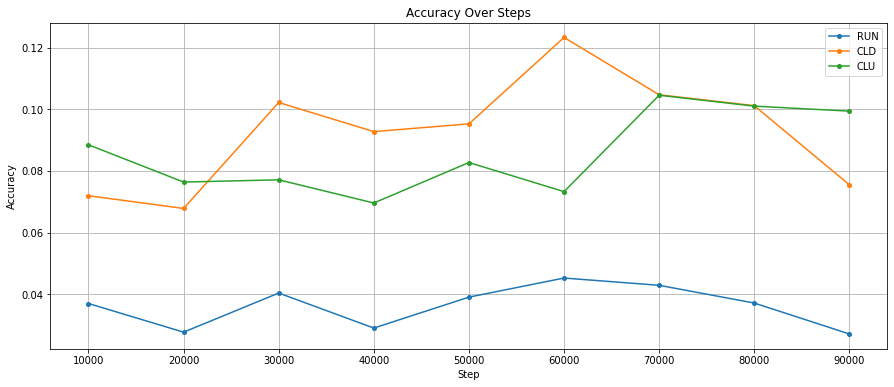

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric(data, metric):
    plt.figure(figsize=(15, 6))
    for target in data['target'].unique():
        # Filter the DataFrame based on the target
        filtered_data = data[data['target'] == target]
        plt.plot(filtered_data['step'], filtered_data[metric], label=target, marker='o', markersize=4)

        # Find the maximum value of the metric and its corresponding step
        max_value = filtered_data[metric].max()
        max_step = filtered_data[filtered_data[metric] == max_value]['step'].values[0]
        print(f'Maximum {metric} for target {target}: {max_value:.4f} at step {max_step}')
    
    plt.title(f'{metric.capitalize()} Over Steps')
    plt.xlabel('Step')
    plt.ylabel(f'{metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_metric(domain_scores, 'accuracy')

Maximum accuracy: 0.0840 at step 70000


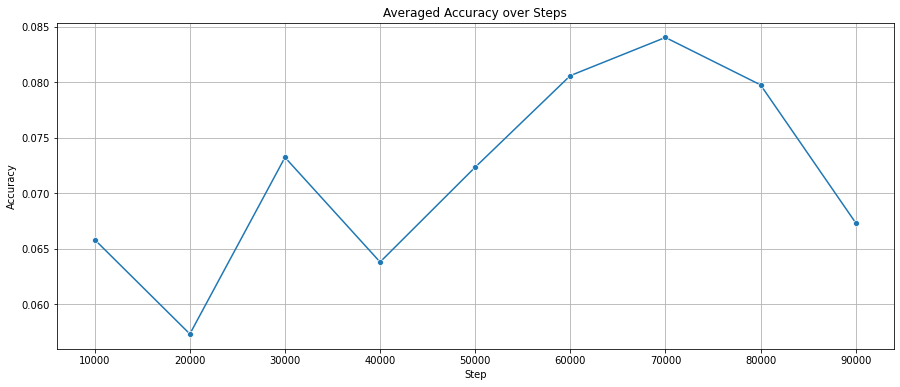

In [15]:
def plot_metric_averaged(data, metric):    
    # Group by step and calculate the mean of the metric
    averaged_data = data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric}: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()


plot_metric_averaged(domain_scores, 'accuracy')